## Metric Design 

### Introduction

In this exercice we are going to define a set of output and input metrics that will be relevant for the rest of our analysis. 

### Exercices

Frequency 

- What's the frequency of `review_score` from table `olist_order_reviews_dataset`?
- What's the frequency of `order_status` from the table `olist_orders_dataset`?
- In which state are sellers mostly located? What about customers?

Metrics 
- Which metric would you use as the output metric of Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### 1 - Frequency 

In [1]:
#load modules 

import pandas as pd
import numpy as np
import os
import seaborn as sns

In [3]:
#load data
from olist.data import Olist

olist = Olist()
data = olist.get_data()

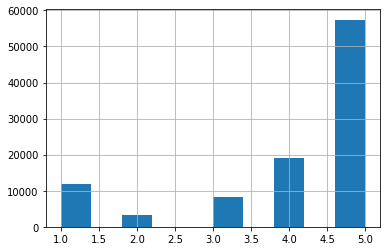

In [9]:
#Plot a histogram of review_score 
data['olist_order_reviews_dataset']['review_score'].hist()

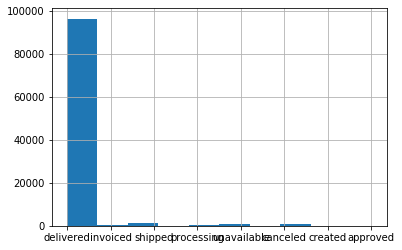

In [11]:
#Plot histogram of order_staus
data['olist_orders_dataset']['order_status'].hist()

In [12]:
df = olist.get_matching_table()

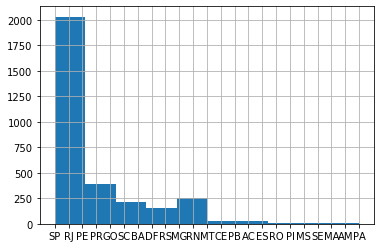

In [21]:
#Plot histogram of seller states
data['olist_sellers_dataset']['seller_state'].hist()

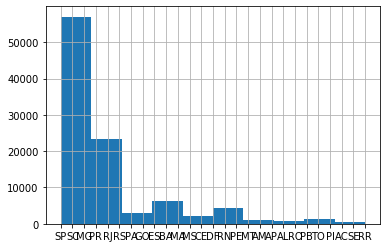

In [23]:
#Plot histogram of customers states
data['olist_customers_dataset']['customer_state'].hist()

## 2 - Metrics

#### Ouptut metric

In [ ]:
#Plot output metric


In [ ]:
#handle datetime

#plot numbers of monthly orders purchased

#### Customer Satisfaction

In [94]:
#Plot customer satisfaction
data['olist_orders_dataset']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [95]:
#handle datetime
list_date_col = ['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']
orders_df = data['olist_orders_dataset'].copy()
for column in list_date_col:
    orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null datetime64[ns]
order_approved_at                99281 non-null datetime64[ns]
order_delivered_carrier_date     97658 non-null datetime64[ns]
order_delivered_customer_date    96476 non-null datetime64[ns]
order_estimated_delivery_date    99441 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [96]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [97]:
import matplotlib.pyplot as plt

orders_df['year_delivered'] = orders_df['order_delivered_customer_date'].dt.year
orders_df['month_delivered'] = orders_df['order_delivered_customer_date'].dt.month
orders_df = orders_df.dropna()

In [98]:
orders_payment = data['olist_order_payments_dataset']

In [99]:
orders_df = orders_df.merge(orders_payment, how='left')

In [106]:
pd.DataFrame(orders_df.groupby(by=['year_delivered', 'month_delivered']).payment_value.sum())

payment_value
year_delivered month_delivered               
2016.0         10.0                  34953.78
               11.0                  11376.19
               12.0                    960.85
2017.0         1.0                   38654.12
               2.0                  228091.83
               3.0                  385435.65
               4.0                  307722.84
               5.0                  600917.76
               6.0                  502197.97
               7.0                  531271.71
               8.0                  627367.19
               9.0                  670205.77
               10.0                 759903.98
               11.0                 754668.98
               12.0                1102232.62
2018.0         1.0                  993588.74
               2.0                  875514.19
               3.0                 1043798.70
               4.0                 1300791.67
               5.0                 1170501.14
               6.0                 1171086.67
               7.0                  948000.64
               8.0                 1347216.73
               9.0                   12875.18
               10.0                    347.95

#### Shipping delay

In [ ]:
#Load orders

In [ ]:
#Handle datetime

In [ ]:
#Plot distribution of wait_time and delay_vs_expected